In [1]:
import csv
import pandas as pd

In [2]:
#para todos retornos de execução de códigos sejam apresentados
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Definição das colunas de acordo com o leiaute fornecido pela B3

In [3]:
# nomes das colunas
nm_colunas = [
    'TIPREG',
    'DTPREG',
    'CODBDI',
    'CODNEG',
    'TPMERC',
    'NOMRES',
    'ESPECI',
    'PRAZOT',
    'MODREF',
    'PREABE',
    'PREMAX',
    'PREMIN',
    'PREMED',
    'PREULT',
    'PREOFC',
    'PREOFV',
    'TOTNEG',
    'QUATOT',
    'VOLTOT',
    'PREEXE',
    'INDOPC',
    'DATVEN',
    'FATCOT',
    'PTOEXE',
    'CODISI',
    'DISMES'    
]

#tamanho das colunas
tam_colunas = [
    2,8,2,12,3,12,10,3,4,11,11,11,11,11,11,11,5,18,16,11,1,8,7,7,12,3    
]

len(tam_colunas)
len(nm_colunas)


26

26

# Carregando o arquivo da B3

In [4]:

 #df = pd.read_fwf('../../data/demo.txt',widths=tam_colunas, names=nm_colunas, skiprows=1, skipfooter=1)
 df = pd.read_fwf('../../data/2021.txt',widths=tam_colunas, names=nm_colunas, skiprows=1, skipfooter=1)


# Verificando a existência de valores "NaN" que possam prejudicar a análise

In [5]:
#df[df.isna().any(axis=1)] -> para selecionar as linhas contendo valores NaN  
df.isna().any() 

#somente PRAZOTOT possui NaN, não havendo necessidade de nenhum tipo de tratamento. Essa variável somente faz sentido para 
#mercado a termo, cujas observações não serão utilizadas neste modelo

TIPREG    False
DTPREG    False
CODBDI    False
CODNEG    False
TPMERC    False
NOMRES    False
ESPECI    False
PRAZOT     True
MODREF    False
PREABE    False
PREMAX    False
PREMIN    False
PREMED    False
PREULT    False
PREOFC    False
PREOFV    False
TOTNEG    False
QUATOT    False
VOLTOT    False
PREEXE    False
INDOPC    False
DATVEN    False
FATCOT    False
PTOEXE    False
CODISI    False
DISMES    False
dtype: bool

# Filtros de ativos

In [6]:
# o campo CODBDI indica o código dos papéis na emissão do boletim diário de informações
# apesar de iteressar somente o CODBDI=2 ou 96 (LOTE PADRAO OU FRACIONARIO), uma análise de frequência nos indica que o arquivo possui também grande volume
# de negociação de "opções"
df['CODBDI'].unique()
df.groupby('CODBDI').count()




array([ 2, 96,  5,  7,  8, 10, 12, 14, 22, 58, 50, 52, 62, 82, 78, 38, 42,
       74, 32, 33, 75, 51, 13], dtype=int64)

,TIPREG,DTPREG,CODNEG,TPMERC,NOMRES,ESPECI,PRAZOT,MODREF,PREABE,PREMAX,...,TOTNEG,QUATOT,VOLTOT,PREEXE,INDOPC,DATVEN,FATCOT,PTOEXE,CODISI,DISMES
CODBDI,,,,,,,,,,,,,,,,,,,,,
2,195327,195327,195327,195327,195327,195327,0,195327,195327,195327,...,195327,195327,195327,195327,195327,195327,195327,195327,195327,195327
5,259,259,259,259,259,259,0,259,259,259,...,259,259,259,259,259,259,259,259,259,259
7,848,848,848,848,848,848,0,848,848,848,...,848,848,848,848,848,848,848,848,848,848
8,6137,6137,6137,6137,6137,6137,0,6137,6137,6137,...,6137,6137,6137,6137,6137,6137,6137,6137,6137,6137
10,669,669,669,669,669,669,0,669,669,669,...,669,669,669,669,669,669,669,669,669,669
12,58361,58361,58361,58361,58361,58361,0,58361,58361,58361,...,58361,58361,58361,58361,58361,58361,58361,58361,58361,58361
13,122,122,122,122,122,122,0,122,122,122,...,122,122,122,122,122,122,122,122,122,122
14,13884,13884,13884,13884,13884,13884,0,13884,13884,13884,...,13884,13884,13884,13884,13884,13884,13884,13884,13884,13884
22,1750,1750,1750,1750,1750,1750,0,1750,1750,1750,...,1750,1750,1750,1750,1750,1750,1750,1750,1750,1750


In [7]:
# filtros
# Critério 1 - somente papéis negociados em R$

df = df.query("MODREF=='R$'")

# Critério 2 - somente ACÕES ORDINÁRIAS e PREFERENCIAIS
# este critério possui dois objetivos:
# - selecionar somente os tipos de ativos mais negociados pelo investidor comum
# - reduzir o número de registros a ser trabalhado
df1 = df[df.ESPECI.str.contains('ON')]
df2 = df[df.ESPECI.str.contains('PN')]

df = pd.concat( [df1,df2])

# Critério 3 - somente LOTE PADRÃO e FRACIONÁRIO
# para este modelo, não temos interesse em outros tipos de ativo, como por exemplo recuperação judicial, opções ou leilões.
df = df.query("CODBDI in (2,96)")

# com os filtros acima aplicados, sobraram somente observações TPMERC(TIPO DE MERCADO) = 10 e 20. Ou seja, "Mercado a Vista" e "Fracionário"
df['TPMERC'].unique()
df['ESPECI'].unique()
df.count()


array([10, 20], dtype=int64)

array(['ON      NM', 'ON      N2', 'ON      N1', 'ON', 'ON  EJ',
       'ON  ES  NM', 'ON  EJ  N1', 'ON  EDJ NM', 'ON      MA',
       'ON  ED  NM', 'ON  EJ  NM', 'ON  EDR NM', 'ON  ED', 'ON  ED  N1',
       'ON      MB', 'ON  EJ  N2', 'ON  EB', 'ON  EJS N1', 'ON  ATZ NM',
       'ON  REC N2', 'ON  EDJ', 'ON  ES', 'ON  REC NM', 'ON  EDJ N1',
       'ON  EB  NM', 'ON  ERJ NM', 'ON  EC  NM', 'ON  ED  N2',
       'ON  EB  N1', 'ON  ES  N2', 'ON  ERJ', 'ON  EB  N2', 'ON  EX',
       'ON  EDR N2', 'ON  EDB N1', 'ON  EDB NM', 'ON  EDR N1',
       'ON  EDJ N2', 'ON  ED  MB', 'ON  EBG NM', 'ON  EB  MA',
       'ON  ES  MA', 'ON  EBG N1', 'ON  EX  NM', 'ON  EC  N1', 'ON  EBG',
       'ON  EDC N1', 'ON  ER', 'ON  EJB NM', 'ON  EC', 'ON  EJB N1',
       'ON  EG  N2', 'PN      N2', 'PN', 'PN      N1', 'PNA', 'PNB',
       'PNA     N1', 'PN  EJ  N1', 'PNB     N1', 'PN  EJ', 'PNA     N2',
       'PNE', 'PNF', 'PNA EJ  N1', 'PNB EJ  N1', 'PNA ED', 'PND',
       'PN  EJ  N2', 'PN  EJS N2', 'PNB ED  N1

TIPREG    192287
DTPREG    192287
CODBDI    192287
CODNEG    192287
TPMERC    192287
NOMRES    192287
ESPECI    192287
PRAZOT         0
MODREF    192287
PREABE    192287
PREMAX    192287
PREMIN    192287
PREMED    192287
PREULT    192287
PREOFC    192287
PREOFV    192287
TOTNEG    192287
QUATOT    192287
VOLTOT    192287
PREEXE    192287
INDOPC    192287
DATVEN    192287
FATCOT    192287
PTOEXE    192287
CODISI    192287
DISMES    192287
dtype: int64

# Importando os pacotes necessários

In [ ]:
# importar os pacotes necessários
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt

# Escolhendo um ativo específico

In [8]:
#pegando somente as ações da PETROBRAS que possuem informações mais completas
df_pet = df.query("CODNEG=='PETR4'")
df_pet = df_pet.sort_values(['DTPREG','CODNEG'])
df_pet = df_pet.reset_index()
df_pet


,index,TIPREG,DTPREG,CODBDI,CODNEG,TPMERC,NOMRES,ESPECI,PRAZOT,MODREF,...,TOTNEG,QUATOT,VOLTOT,PREEXE,INDOPC,DATVEN,FATCOT,PTOEXE,CODISI,DISMES
0,2749,1,20210104,2,PETR4,10,PETROBRAS,PN N2,NaN,R$,...,0,2891093230000,7471970000,2153768,7,58000000,0,9999,123100000010,0
1,8616,1,20210105,2,PETR4,10,PETROBRAS,PN N2,NaN,R$,...,30000,3004073890000,9518110000,2794814,2,48000000,0,9999,123100000010,0
2,14477,1,20210106,2,PETR4,10,PETROBRAS,PN N2,NaN,R$,...,60000,3007101070000,9656250000,2947101,5,88000000,0,9999,123100000010,0
3,20438,1,20210107,2,PETR4,10,PETROBRAS,PN N2,NaN,R$,...,0,3101755790000,5617130000,1730397,1,79000000,0,9999,123100000010,0
4,26659,1,20210108,2,PETR4,10,PETROBRAS,PN N2,NaN,R$,...,0,3112829010000,6713630000,2084999,7,58000000,0,9999,123100000010,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,996357,1,20211223,2,PETR4,10,PETROBRAS,PN N2,NaN,R$,...,20000,2833433810000,2871360000,812335,5,62000000,0,9999,123100000010,0
243,996358,1,20211227,2,PETR4,10,PETROBRAS,PN N2,NaN,R$,...,50000,2876460600000,4422790000,1265090,3,1000000,0,9999,123100000010,0
244,996359,1,20211228,2,PETR4,10,PETROBRAS,PN N2,NaN,R$,...,70000,2878431420000,3068810000,886001,6,99000000,0,9999,123100000010,0
245,996360,1,20211229,2,PETR4,10,PETROBRAS,PN N2,NaN,R$,...,30000,2854610880000,3550840000,1015407,3,91000000,0,9999,123100000010,0


# A variável PREULT , indica o último valor do ativo no dia e será a variável de trabalho

In [9]:
df_pet['PREULT']=df_pet['PREULT']/100000
valores = df_pet['PREULT']
valores.shape

(247,)

# A variável dias_input indica o número de dias que será utilizado como informação de entrada para a predição.

## Dessa forma, para que o modelo possa predizer o valor do ativo em uma determinada data, irá utilizar como "input" os valores do ativo correspondentes aos "dias_input" anteriores.

In [10]:
#número de dias utilizados para predição (input)
dias_input = 30

# Separação entre teste e treino

In [12]:
import numpy as np

tam_treino = int(len(valores) * 0.70)
tam_teste = len(valores) - tam_treino
tam_treino
tam_teste

dados_treino, dados_teste = np.array(valores[0:tam_treino]), np.array(valores[tam_treino - dias_input:])
dados_valid = np.array(valores[tam_treino:])


dados_treino.shape, dados_teste.shape, dados_valid.shape


172

75

((172,), (105,), (75,))

# "plotando" o gráfico com séries de treino e input

In [ ]:
import matplotlib.pyplot as plt

intervalo = 10


plt.figure(figsize = (18,9))
plt.plot(df_pet['PREULT'].loc[0:tam_treino], color = 'blue', label = 'treino')
plt.plot(df_pet['PREULT'].loc[tam_treino:], color = 'red', label = 'teste')
plt.xticks(range(0,len(df_pet),intervalo), df_pet['DTPREG'].loc[::intervalo], rotation=45)
plt.xlabel('Datas', fontsize=18)
plt.ylabel('Preço Médio', fontsize=18)
plt.title("Histórico de Preço", fontsize=30)
plt.legend()
plt.show()




# Normalização dos dados (z-score)

In [ ]:
import scipy.stats as stats


dados_treino_z = np.reshape(stats.zscore(np.array(dados_treino)), (len(dados_treino),1))
dados_teste_z =  np.reshape(stats.zscore(np.array(dados_teste)), (len(dados_teste),1))
dados_valid_z =  np.reshape(stats.zscore(np.array(dados_valid)), (len(dados_valid),1))






In [ ]:
#treino
input_treino, target_treino = [], []
for i in range(dias_input, len(dados_treino_z)):
    input_treino.append(dados_treino_z[i-dias_input:i])
    target_treino.append(dados_treino_z[i])


#teste
input_teste = []
for i in range(dias_input, len(dados_teste_z)):
    input_teste.append(dados_teste_z[i-dias_input:i]) 
    
#val
input_valid, target_valid = [], []
for i in range(dias_input, len(dados_valid_z)):
    input_valid.append(dados_valid_z[i-dias_input:i])
    target_valid.append(dados_valid_z[i])

#converter tudo pra matriz numpy
input_treino = np.array(input_treino)
target_treino = np.array(target_treino)
input_teste = np.array(input_teste)
input_valid = np.array(input_valid)
target_valid = np.array(target_valid)


input_treino.shape
input_teste.shape
input_valid.shape

   

    

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
dados_treino_z = scaler.fit_transform(np.array(dados_treino).reshape(-1,1))
dados_teste_z = scaler.transform(np.array(dados_teste).reshape(-1,1))
dados_valid_z = scaler.transform(np.array(dados_valid).reshape(-1,1))

dados_valid_z.shape
len(dados_teste_z)

(75, 1)

105

# Gerando os dados "input" e "target" necessários para treinar o modelo

In [14]:
#treino
input_treino, target_treino = [], []
for i in range(dias_input, len(dados_treino_z)):
    input_treino.append(dados_treino_z[i-dias_input:i])
    target_treino.append(dados_treino_z[i])


#teste
input_teste = []
for i in range(dias_input, len(dados_teste_z)):
    input_teste.append(dados_teste_z[i-dias_input:i]) 
    
#val
input_valid, target_valid = [], []
for i in range(dias_input, len(dados_valid_z)):
    input_valid.append(dados_valid_z[i-dias_input:i])
    target_valid.append(dados_valid_z[i])

#converter tudo pra matriz numpy
input_treino = np.array(input_treino)
target_treino = np.array(target_treino)
input_teste = np.array(input_teste)
input_valid = np.array(input_valid)
target_valid = np.array(target_valid)


input_treino.shape
target_treino.shape
input_teste.shape
input_valid.shape
target_valid.shape

    

(142, 30, 1)

(142, 1)

(75, 30, 1)

(45, 30, 1)

(45, 1)

   # Realizando o treinamento do modelo

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.optimizers import SGD

modelo = Sequential()
modelo.add(LSTM(100, return_sequences=True, input_shape=(dias_input, 1)))
#model.add(Dropout(0.3))
modelo.add(LSTM(100, return_sequences=False, input_shape=(dias_input, 1)))
#model.add(Dropout(0.3))
modelo.add(Dense(1))
modelo.compile(loss='mse', optimizer='adam')

hist_modelo = modelo.fit(input_treino, target_treino, validation_data = (input_valid, target_valid), epochs=30, batch_size=32)

modelo.summary()

Epoch 1/30
5/5 [==============================] - 8s 403ms/step - loss: 0.1588 - val_loss: 0.0642
Epoch 2/30
5/5 [==============================] - 0s 72ms/step - loss: 0.0488 - val_loss: 0.0413
Epoch 3/30
5/5 [==============================] - 0s 71ms/step - loss: 0.0347 - val_loss: 0.0491
Epoch 4/30
5/5 [==============================] - 0s 87ms/step - loss: 0.0253 - val_loss: 0.0127
Epoch 5/30
5/5 [==============================] - 0s 77ms/step - loss: 0.0230 - val_loss: 0.0110
Epoch 6/30
5/5 [==============================] - 0s 74ms/step - loss: 0.0196 - val_loss: 0.0195
Epoch 7/30
5/5 [==============================] - 0s 88ms/step - loss: 0.0196 - val_loss: 0.0226
Epoch 8/30
5/5 [==============================] - 0s 91ms/step - loss: 0.0180 - val_loss: 0.0122
Epoch 9/30
5/5 [==============================] - 0s 101ms/step - loss: 0.0182 - val_loss: 0.0098
Epoch 10/30
5/5 [==============================] - 0s 74ms/step - loss: 0.0174 - val_loss: 0.0156
Epoch 11/30
5/5 [==========

# Análise do histórico de treinamento

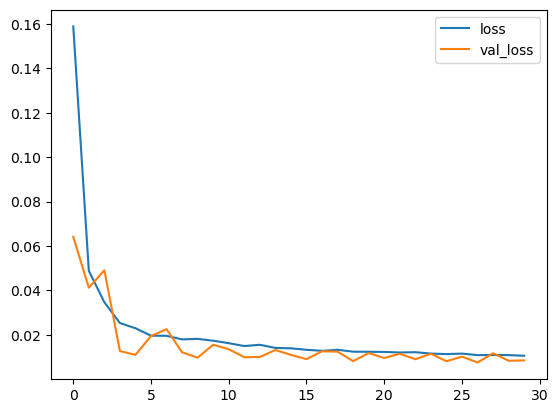

In [16]:
import matplotlib.pyplot as plt

plt.plot(hist_modelo.history["loss"], label='loss')
plt.plot(hist_modelo.history["val_loss"], label='val_loss')
plt.legend()

# Realização da predição dos dados de teste

In [17]:
resultado = modelo.predict(input_teste)
resultado.shape
input_teste.shape
dados_teste_z.shape

3/3 [==============================] - 1s 24ms/step


(75, 1)

(75, 30, 1)

(105, 1)

# Análise dos resultados

In [18]:
resultado = scaler.inverse_transform(resultado)
real = scaler.inverse_transform(dados_teste_z)
resultado
real

array([[25.625206],
       [25.456097],
       [25.39211 ],
       [25.43381 ],
       [25.495764],
       [25.469393],
       [25.28274 ],
       [25.137836],
       [25.153797],
       [25.347206],
       [25.65545 ],
       [26.04137 ],
       [26.44579 ],
       [26.80677 ],
       [27.10715 ],
       [27.378057],
       [27.691654],
       [28.111826],
       [28.450506],
       [28.69185 ],
       [28.902975],
       [29.125902],
       [29.299576],
       [29.475475],
       [29.576431],
       [29.57378 ],
       [29.350233],
       [29.031937],
       [28.544874],
       [27.928362],
       [27.60759 ],
       [27.526548],
       [27.578617],
       [27.718904],
       [27.734144],
       [27.698935],
       [27.542784],
       [27.19352 ],
       [26.763136],
       [26.376919],
       [26.130943],
       [25.994871],
       [25.922546],
       [25.916862],
       [26.042818],
       [26.2031  ],
       [26.288965],
       [26.279465],
       [26.32103 ],
       [26.487843],


array([[27.25],
       [26.86],
       [26.42],
       [26.28],
       [28.56],
       [28.31],
       [28.02],
       [28.52],
       [28.57],
       [28.94],
       [29.34],
       [28.7 ],
       [27.  ],
       [26.98],
       [26.5 ],
       [26.41],
       [27.11],
       [27.43],
       [27.62],
       [27.64],
       [28.13],
       [28.45],
       [27.53],
       [26.91],
       [26.88],
       [26.33],
       [26.51],
       [25.51],
       [24.82],
       [25.59],
       [26.11],
       [25.96],
       [26.18],
       [25.89],
       [25.16],
       [24.25],
       [25.01],
       [25.93],
       [26.59],
       [26.84],
       [27.17],
       [27.31],
       [27.28],
       [27.36],
       [27.69],
       [28.38],
       [29.26],
       [28.73],
       [28.7 ],
       [29.13],
       [29.58],
       [29.49],
       [29.88],
       [29.63],
       [29.38],
       [28.41],
       [28.41],
       [27.45],
       [26.76],
       [28.6 ],
       [28.91],
       [28.8 ],
       [

<Figure size 1800x900 with 0 Axes>

([<matplotlib.axis.XTick at 0x24531454df0>,
 [Text(0, 0, '20210913'),
  Text(10, 0, '20210927'),
  Text(20, 0, '20211011'),
  Text(30, 0, '20211026'),
  Text(40, 0, '20211110'),
  Text(50, 0, '20211125'),
  Text(60, 0, '20211209'),
  Text(70, 0, '20211223')])

Text(0.5, 0, 'Datas')

Text(0, 0.5, 'Preço Médio')

Text(0.5, 1.0, 'Projeção de Preço')

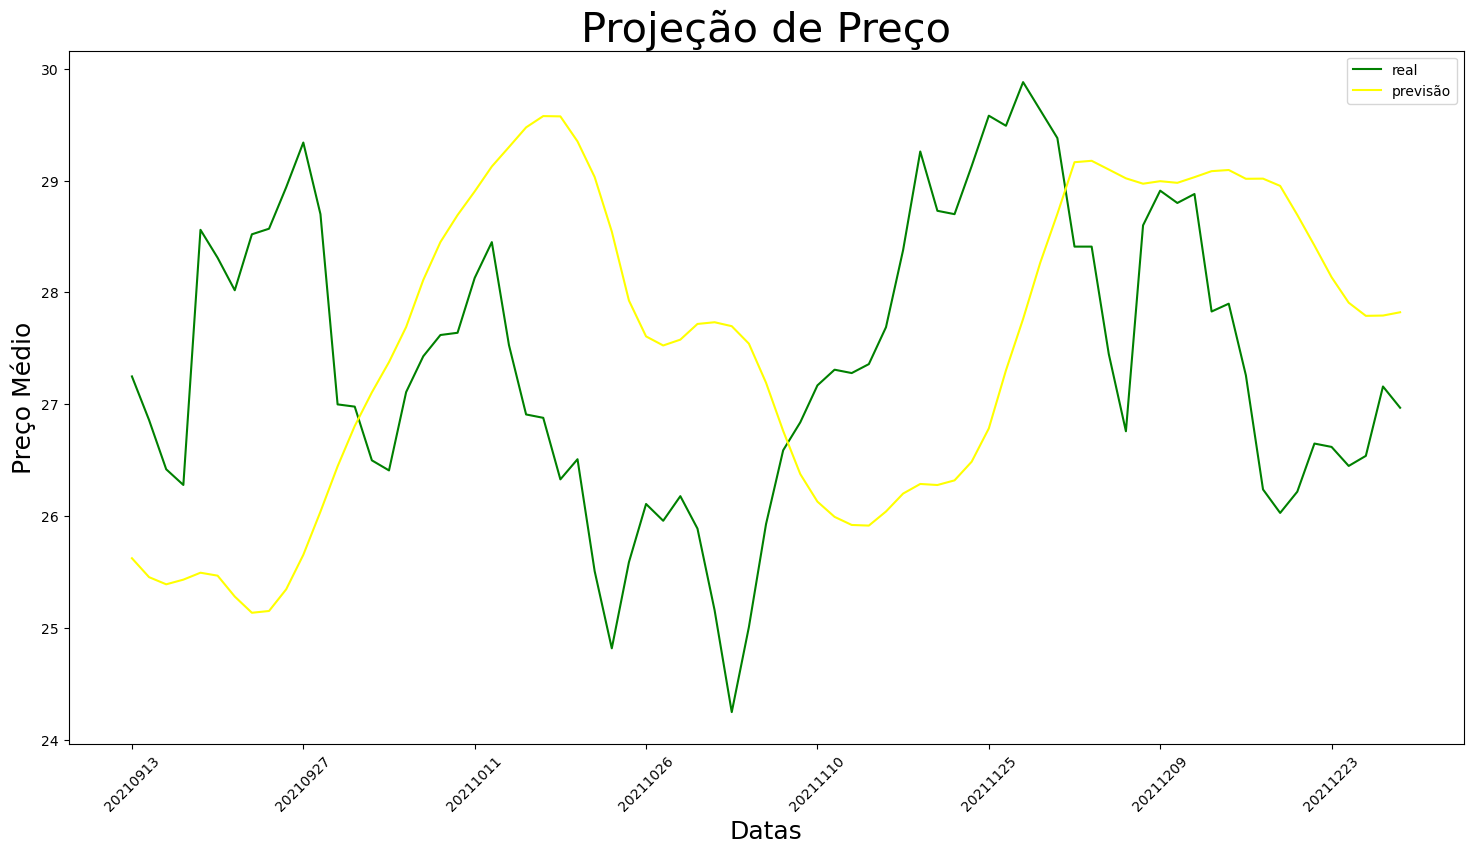

In [19]:



plt.figure(figsize = (18,9))
plt.plot(dados_teste[:len(dados_teste)-dias_input], color = 'green', label = 'real')
plt.plot(resultado, color = 'yellow', label = 'previsão')
#plt.xticks(range(0, len(dados_teste), 50), df_pet['Date'].iloc[- len(real)::50], rotation=45)
plt.xticks(range(0,len(input_teste),10), df_pet['DTPREG'].iloc[-len(input_teste)::10], rotation=45)
plt.xlabel('Datas', fontsize=18)
plt.ylabel('Preço Médio', fontsize=18)
plt.title("Projeção de Preço", fontsize=30)
plt.legend()
plt.show()

In [ ]:
#realiza a normalização dos dados (z-score)
import scipy.stats as stats
type (valores)
valores_z=stats.zscore(np.array(valores))
type (valores_z)

In [ ]:
#dividindo em treino, teste e validação

tam_treino = int(len(valores_z) * 0.70)
tam_teste = len(valores_z) - tam_treino
tam_treino
tam_teste
type(valores_z[i-dias_input:i])

In [ ]:
#gerando a base de treino
input_treino, saida_treino = [], []
for i in range(dias_input, tam_treino):
    input_treino.append(valores_z[i-dias_input:i])
    saida_treino.append(valores_z[i])

    
input_treino = np.array(input_treino)
saida_treino = np.array(saida_treino)
saida_treino
len(input_treino)
len(saida_treino)

In [ ]:
#treinando o modelo
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(dias_input, 1)))
#model.add(Dropout(0.3))
model.add(LSTM(100, return_sequences=False, input_shape=(dias_input, 1)))
#model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

model.summary()


result = model.fit(input_treino, saida_treino, epochs=30, batch_size=30)

In [ ]:
#testando o modelo
#pega os ultimos 30 dias antes do inicio dos testes
input_teste = []

input_teste.append(valores_z[tam_treino-dias_input:tam_treino])
input_teste = np.transpose( np.array(input_teste))




In [ ]:
input_teste.shape
predicted = []
prox_pred = input_teste

for i in (range(tam_treino, tam_treino + tam_teste)):
    result=model.predict(input_teste,batch_size=30)
    result[0,0]
    predicted = np.append(predicted,result)
    print ('printando o array predito')
    predicted
    print ("pronto")
    input_teste = np.delete(input_teste[0],0)
    input_teste
    input_teste = np.append(input_teste,result[0,0])
    input_teste
    input_teste = np.reshape(input_teste, (dias_input, 1))
    input_teste


#type(input_teste)

#input_teste

#result = model.predict(input_teste)
#result


In [ ]:
predicted


In [ ]:

X_test = []
for i in range(dias_input, dias_input + tam_teste):
    X_test.append(valores_z[i-dias_input:i])
    
X_test[0:1]
input_teste=[]
input_teste.append(np.array(valores_z[tam_treino-dias_input:tam_treino]))
input_teste
result=model.predict()

In [ ]:
stats.zscore()

In [ ]:
for i in (range(tam_traino, tam_teste)):
    result=model.predict(input_teste,batch_size=30)
    input_teste.append(result)
    input_teste.drop(0)